# **Study "Online Shoppers Purchasing Intention" using Decision Tree Classifier**

# Context:

Typically e-commerce datasets are proprietary and consequently hard to find among publicly available data.
This is a transnational data set which contains all the transactions occurring online retail.
Ecommerce data is information relating to the visitors and performance of an online shop. It's mostly used by marketers e.g. in understanding consumer behavior and enhancing conversion funnels.

# Objective:

The objective is to find out the features which have the most information context to differentiate the positive class and negative class and also build a model to predict whether a customer will buy a product or not.

# Data Description:

- Out of the 12,330 customer samples in the dataset, 84.5% (10,422) were negative class samples (i.e. customers who did not end up buying the product), and the rest (1908) were positive class samples (i.e. customers who ended up buying).
- The dataset consists of 10 numerical and 8 categorical attributes.
- The 'Revenue' attribute can be used as the class label.

--------------------------------------
- "Administrative", "Administrative Duration", "Informational", "Informational Duration", "Product Related" and "Product Related Duration": These represent the number of different types of pages visited by the visitor in that session and total time spent in each of these page categories.
- The values of these features are derived from the URL information of the pages visited by the user and updated in real time when a user takes an action, e.g. moving from one page to another.
--------------------------------------
- The "Bounce Rate", "Exit Rate" and "Page Value" features represent the metrics measured by "Google Analytics" for each page in the e-commerce site.
- **Bounce Rate:** The value of "Bounce Rate" feature for a web page refers to the percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server during that session.
- **Exit Rate:** The value of "Exit Rate" feature for a specific web page is calculated as for all pageviews to the page, the percentage that were the last in the session.

Read more about **Bounce Rate** vs **Exit Rate** [here](https://support.google.com/analytics/answer/2525491?hl=en&ref_topic=6156780)
- **Page Value:** The "Page Value" feature represents the average value for a web page that a user visited before completing an e-commerce transaction.

Read more about **Page Value** [here](https://support.google.com/analytics/answer/2695658?hl=en).

--------------------------------------
- **Special Day:** The "Special Day" feature indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with transaction.
- The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date.
- For example, for Valentina’s day, this value takes a nonzero value between February 2 and February 12, zero before and after this date unless it is close to another special day, and its maximum value of 1 on February 8.
--------------------------------------
- The dataset also includes operating system, browser, region, traffic type, visitor type as returning or new visitor, a Boolean value indicating whether the date of the visit is weekend, and month of the year.

In [45]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import graphviz
import sklearn.tree as tree

In [2]:
df = pd.read_csv('online_shoppers_intention.csv')
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [3]:
df.shape

(12330, 18)

In [4]:
df[df.duplicated()].count()

Administrative             125
Administrative_Duration    125
Informational              125
Informational_Duration     125
ProductRelated             125
ProductRelated_Duration    125
BounceRates                125
ExitRates                  125
PageValues                 125
SpecialDay                 125
Month                      125
OperatingSystems           125
Browser                    125
Region                     125
TrafficType                125
VisitorType                125
Weekend                    125
Revenue                    125
dtype: int64

In [5]:
df.drop_duplicates(inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12205 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12205 non-null  int64  
 1   Administrative_Duration  12205 non-null  float64
 2   Informational            12205 non-null  int64  
 3   Informational_Duration   12205 non-null  float64
 4   ProductRelated           12205 non-null  int64  
 5   ProductRelated_Duration  12205 non-null  float64
 6   BounceRates              12205 non-null  float64
 7   ExitRates                12205 non-null  float64
 8   PageValues               12205 non-null  float64
 9   SpecialDay               12205 non-null  float64
 10  Month                    12205 non-null  object 
 11  OperatingSystems         12205 non-null  int64  
 12  Browser                  12205 non-null  int64  
 13  Region                   12205 non-null  int64  
 14  TrafficType           

In [7]:
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [8]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Administrative,12205.0,2.338878,3.330436,0.0,0.000000,1.000000,4.000000,27.000000
Administrative_Duration,12205.0,81.646331,177.491845,0.0,0.000000,9.000000,94.700000,3398.750000
Informational,12205.0,0.508726,1.275617,0.0,0.000000,0.000000,0.000000,24.000000
Informational_Duration,12205.0,34.825454,141.424807,0.0,0.000000,0.000000,0.000000,2549.375000
ProductRelated,12205.0,32.045637,44.593649,0.0,8.000000,18.000000,38.000000,705.000000
ProductRelated_Duration,12205.0,1206.982457,1919.601400,0.0,193.000000,608.942857,1477.154762,63973.522230
BounceRates,12205.0,0.020370,0.045255,0.0,0.000000,0.002899,0.016667,0.200000
ExitRates,12205.0,0.041466,0.046163,0.0,0.014231,0.025000,0.048529,0.200000
PageValues,12205.0,5.949574,18.653671,0.0,0.000000,0.000000,0.000000,361.763742
SpecialDay,12205.0,0.061942,0.199666,0.0,0.000000,0.000000,0.000000,1.000000


In [9]:
df['VisitorType'].unique()

array(['Returning_Visitor', 'New_Visitor', 'Other'], dtype=object)

In [10]:
df['Revenue'].unique()

array([False,  True])

In [11]:
df['Revenue'] = df['Revenue'].astype('int')

In [12]:
df['Revenue']

0        0
1        0
2        0
3        0
4        0
        ..
12325    0
12326    0
12327    0
12328    0
12329    0
Name: Revenue, Length: 12205, dtype: int64

<AxesSubplot:xlabel='VisitorType', ylabel='count'>

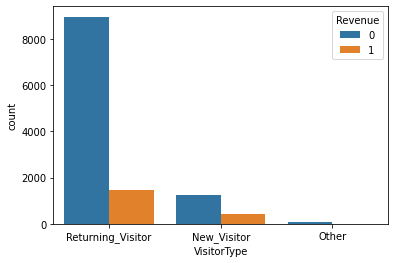

In [13]:
sns.countplot(df['VisitorType'], hue=df['Revenue'])

<AxesSubplot:xlabel='Weekend', ylabel='count'>

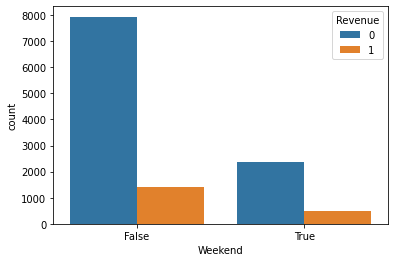

In [14]:
sns.countplot(df['Weekend'], hue=df['Revenue'])

In [15]:
df['Month'].value_counts(normalize=True)

May     0.272757
Nov     0.244326
Mar     0.152397
Dec     0.139779
Oct     0.044982
Sep     0.036706
Aug     0.035477
Jul     0.035395
June    0.023351
Feb     0.014830
Name: Month, dtype: float64

<AxesSubplot:xlabel='Month', ylabel='count'>

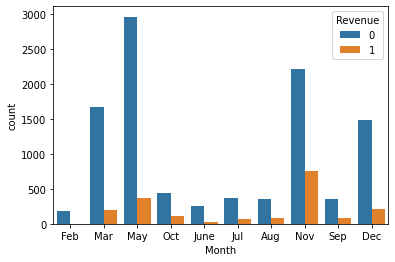

In [16]:
sns.countplot(df['Month'], hue=df['Revenue'])

In [18]:
df.groupby('Revenue').mean().transpose()

Revenue,0,1
Administrative,2.143440,3.393606
Administrative_Duration,74.635276,119.483244
Informational,0.457318,0.786164
Informational_Duration,30.603289,57.611427
ProductRelated,29.050403,48.210168
ProductRelated_Duration,1082.976881,1876.209615
BounceRates,0.023197,0.005117
ExitRates,0.045526,0.019555
PageValues,1.999985,27.264518
SpecialDay,0.069127,0.023166


In [20]:
pd.crosstab(df['Revenue'], df['VisitorType']).transpose()

Revenue,0,1
VisitorType,,
New_Visitor,1271,422
Other,65,16
Returning_Visitor,8961,1470


In [21]:
other_index = df[df['VisitorType']=='Other'].index
df.drop(index=other_index, axis=0, inplace=True)
df['VisitorType'].unique()

array(['Returning_Visitor', 'New_Visitor'], dtype=object)

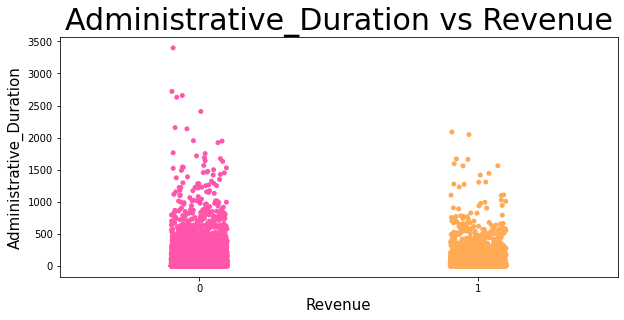

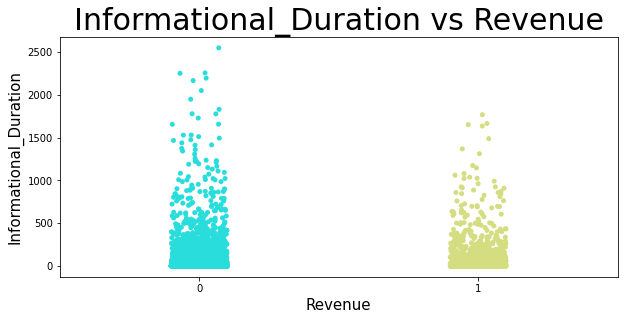

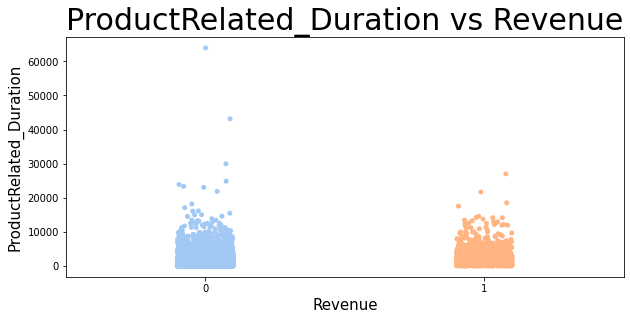

In [31]:
duration_columns = ['Administrative_Duration', 'Informational_Duration','ProductRelated_Duration']
palettes = ['spring', 'rainbow', 'pastel']
plt.rcParams['figure.figsize'] = (10,15) # another way of plt.figure(figsize=(10,15))
for index, col in enumerate(duration_columns):
    plt.subplot(3, 1, index+1)
    sns.stripplot(df['Revenue'], df[col], palette=palettes[index])
    title = col + ' vs Revenue'
    plt.title(title, fontsize= 30)
    plt.ylabel(col, fontsize=15)
    plt.xlabel('Revenue', fontsize=15)
    plt.show()

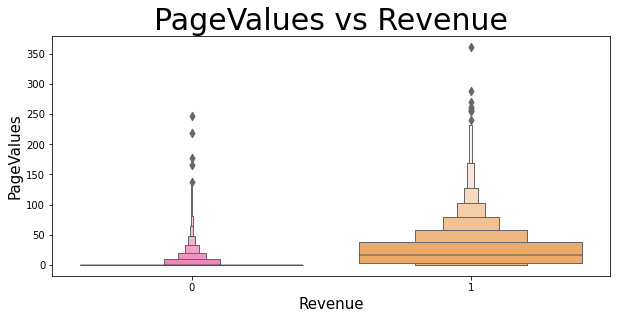

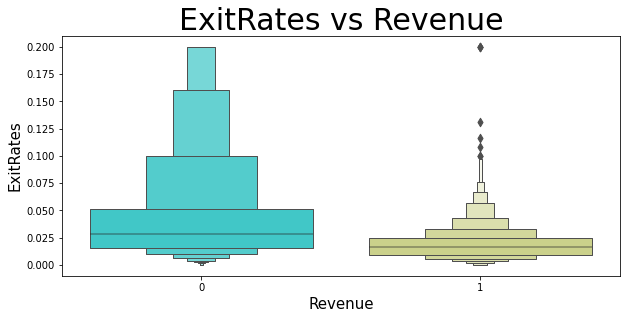

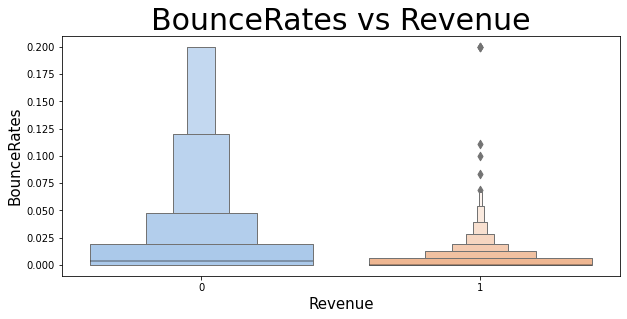

In [34]:
duration_columns = ['PageValues', 'ExitRates','BounceRates']
palettes = ['spring', 'rainbow', 'pastel']
plt.rcParams['figure.figsize'] = (10,15) # another way of plt.figure(figsize=(10,15))
for index, col in enumerate(duration_columns):
    plt.subplot(3, 1, index+1)
    sns.boxenplot(df['Revenue'], df[col], palette=palettes[index])
    title = col + ' vs Revenue'
    plt.title(title, fontsize= 30)
    plt.ylabel(col, fontsize=15)
    plt.xlabel('Revenue', fontsize=15)
    plt.show()

In [38]:
df = pd.get_dummies(df, drop_first=True)
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Dec,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_Returning_Visitor
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,0,1,0,0,0,0,0,0,0,1
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,...,0,1,0,0,0,0,0,0,0,1
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,0,1,0,0,0,0,0,0,0,1
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,...,0,1,0,0,0,0,0,0,0,1
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,...,0,1,0,0,0,0,0,0,0,1


In [39]:
X=df.drop('Revenue', axis=1)
y=df['Revenue']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [42]:
dTree = DecisionTreeClassifier(criterion='gini', random_state=1)
dTree.fit(X_train, y_train)
y_predict = dTree.predict(X_test)

In [43]:
print(accuracy_score(y_test,y_predict))
print(dTree.score(X_test, y_test))
print(dTree.score(X_train, y_train))

0.8584387025838373
0.8584387025838373
1.0


`its an overfit model as the accuracy for training data is 100%`

In [44]:
confusion_matrix(y_test, y_predict)

array([[2802,  278],
       [ 237,  321]])

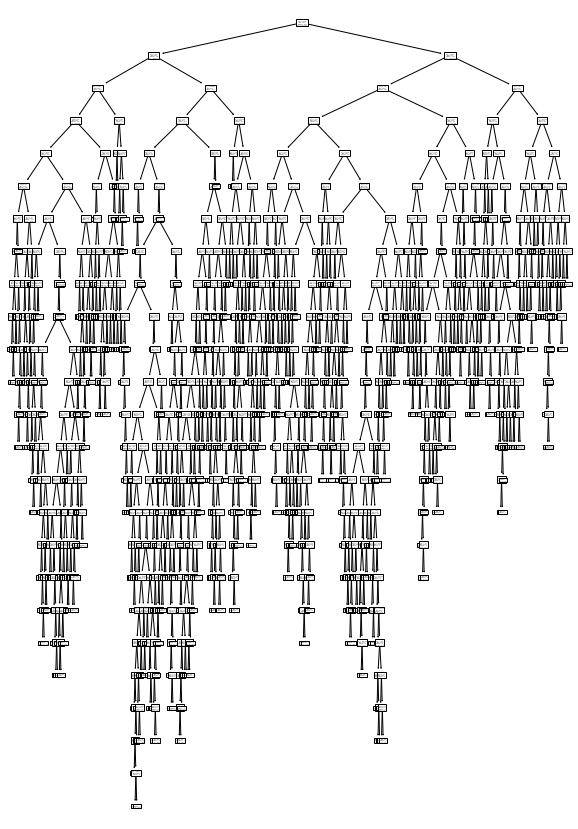

In [47]:
tree.plot_tree(dTree)
plt.show()

In [48]:
#Prune the tree

pruned_dt = DecisionTreeClassifier(criterion='gini', random_state=1, max_depth=5, min_samples_split=150,
                                   min_samples_leaf=25)
pruned_dt.fit(X_train, y_train)
y_predict = pruned_dt.predict(X_test)

In [50]:
print(accuracy_score(y_test,y_predict))
print(pruned_dt.score(X_test, y_test))
print(pruned_dt.score(X_train, y_train))

0.9015942825728422
0.9015942825728422
0.9023096865425406


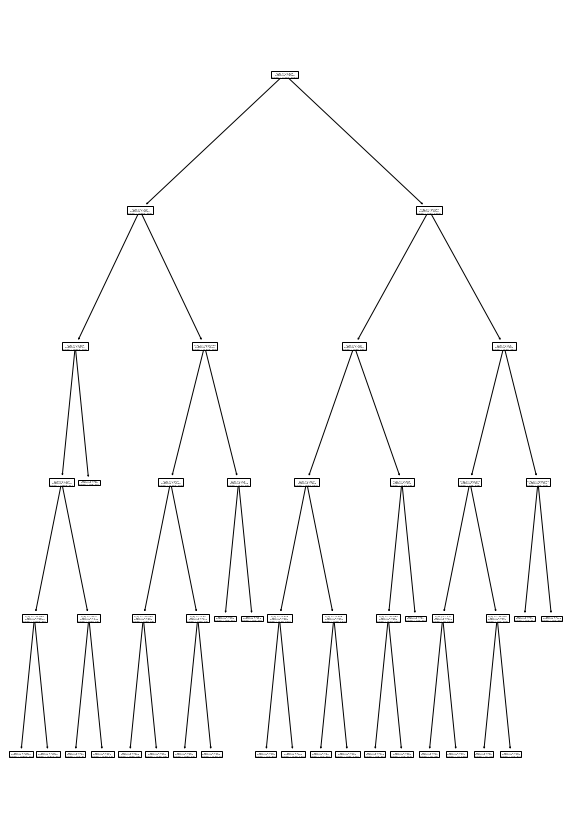

In [51]:
tree.plot_tree(pruned_dt)
plt.show()

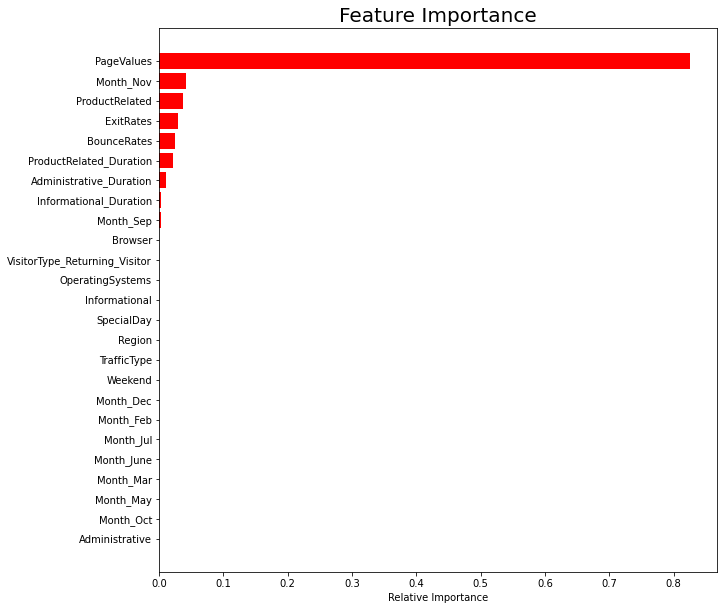

In [58]:
feature_names = X_train.columns
importance = pruned_dt.feature_importances_
indices = np.argsort(importance)

plt.rcParams['figure.figsize'] = (10,10)
plt.title('Feature Importance', fontsize= 20)
plt.barh(range(len(indices)), importance[indices], color= 'r', align='center') #plt.barh - horizontal barplot instead of vertical
plt.xlabel('Relative Importance')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.show()

# Conclusion:

1. PageValue has high importance in predicting the chance of customer buying a product on the website